in this notebook we will analyze the data of yellow 2012 as it was done with the other data in notebooks 4,5 and 6.

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# **Plot_taxis_pickups**

In [3]:
yellow_trips_data = pd.read_csv("data/yellow12_nta.csv")

In [5]:
print(yellow_trips_data.isna().sum())
yellow_trips_data.head()

pickup_datetime           0
dropoff_datetime          0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude        17
dropoff_latitude         17
p_geometry                0
pickup_borough       199765
pickup_ntacode       199765
pickup_ntaname       199765
dtype: int64


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,p_geometry,pickup_borough,pickup_ntacode,pickup_ntaname
0,2012-01-19 08:45:06,2012-01-19 08:50:52,-74.010669,40.715217,-74.005392,40.711362,POINT (-74.01066899999998 40.715217),Manhattan,MN24,SoHo-TriBeCa-Civic Center-Little Italy
1,2012-01-05 00:42:00,2012-01-05 00:46:00,-74.002933,40.718197,-74.013570,40.705077,POINT (-74.002933 40.718197),Manhattan,MN24,SoHo-TriBeCa-Civic Center-Little Italy
2,2012-01-08 12:12:00,2012-01-08 12:15:00,-73.961967,40.773578,-73.954072,40.778792,POINT (-73.961967 40.773578),Manhattan,MN40,Upper East Side-Carnegie Hill
3,2012-01-04 21:19:13,2012-01-04 21:28:51,-73.987095,40.720450,-73.985948,40.743825,POINT (-73.98709499999998 40.72045),Manhattan,MN27,Chinatown
4,2012-01-16 15:20:48,2012-01-16 15:56:26,-73.856200,40.759600,-73.604600,41.088200,POINT (-73.8562 40.7596),Queens,QN27,East Elmhurst


In [6]:
yellow_pickup_location = yellow_trips_data[["pickup_longitude", "pickup_latitude"]].copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
yellow_pickup_location_train, yellow_pickup_location_test = train_test_split(yellow_pickup_location, test_size=0.2, random_state=42)

In [9]:
yellow_graph_dataset = yellow_pickup_location_test[(yellow_pickup_location_test["pickup_longitude"] < -73) & (yellow_pickup_location_test["pickup_longitude"] > -76)].copy()

In [10]:
nyc_shp = gpd.read_file("data/Neighborhood Tabulation Areas.geojson")

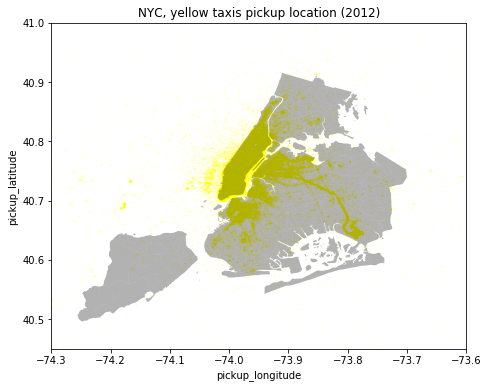

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlim([-74.3,-73.6])
ax.set_ylim([40.45,41])
ax.set_title("NYC, yellow taxis pickup location (2012)")
yellow_graph_dataset.plot(s = 1, ax = ax, kind="scatter", x="pickup_longitude", y="pickup_latitude", color= "yellow" , alpha=0.1)
nyc_shp.plot(ax = ax, alpha = 0.3, color="black")

# Peak Hour Analysis

In [13]:
yellow_trips_data['format_pickup_datetime'] = pd.to_datetime(yellow_trips_data['pickup_datetime'])
yellow_trips_pickup_hour = yellow_trips_data["format_pickup_datetime"].dt.hour
yellow_trips_data['day_of_week'] = yellow_trips_data["format_pickup_datetime"].dt.day_name()
yellow_trips_groupedby_day = yellow_trips_data.groupby("day_of_week")

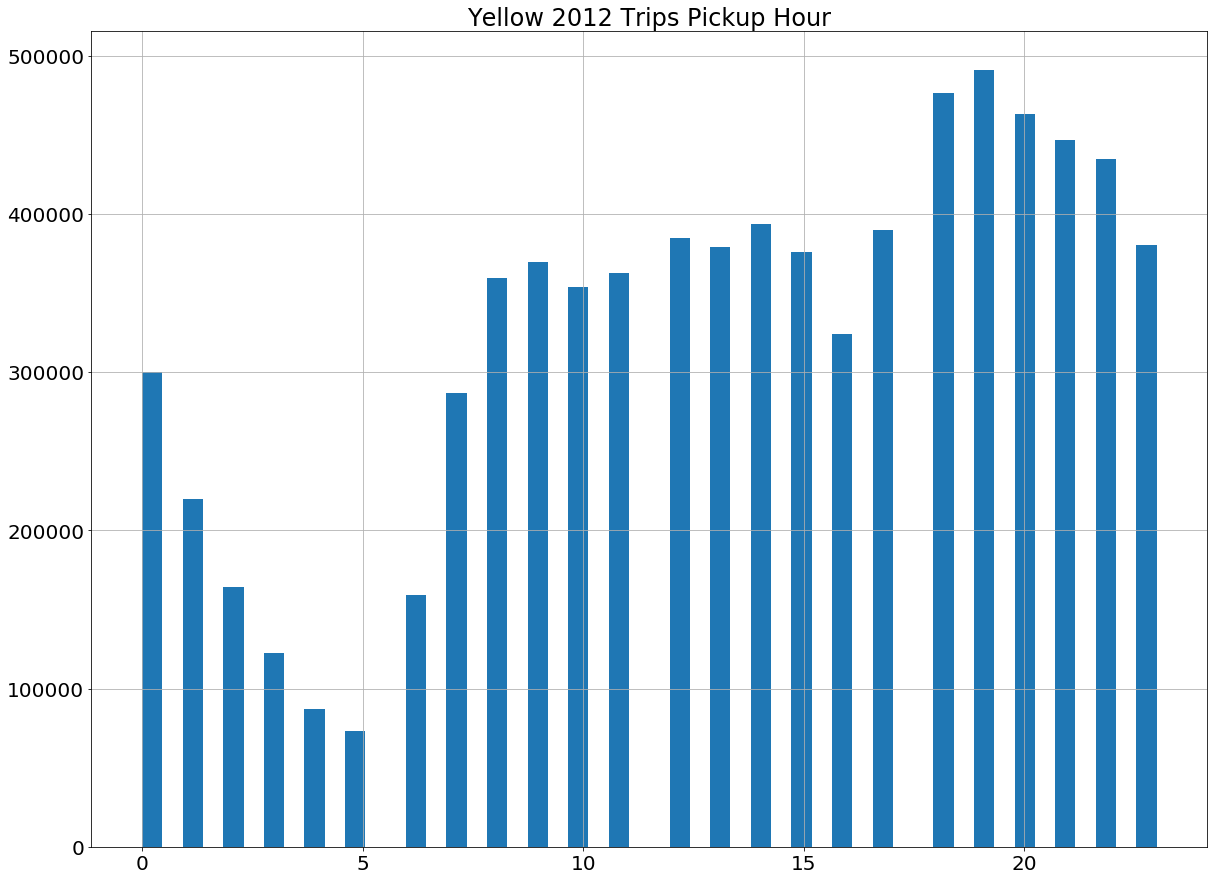

In [16]:
# histograma de las horas del pickup
yellow_trips_pickup_hour.hist(bins=50, figsize=(20,15))
plt.title("Yellow 2012 Trips Pickup Hour")
plt.rcParams.update({'font.size': 20})
plt.show()

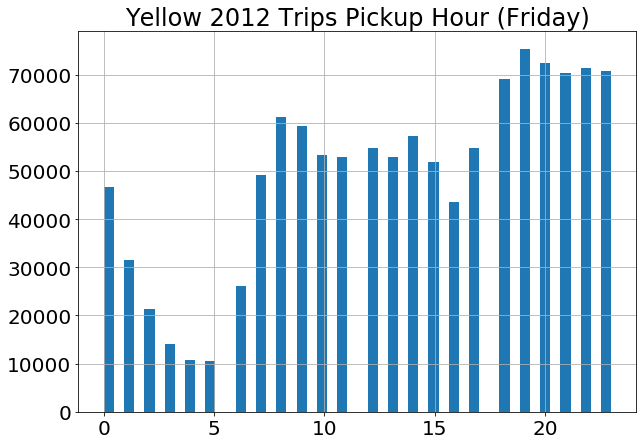

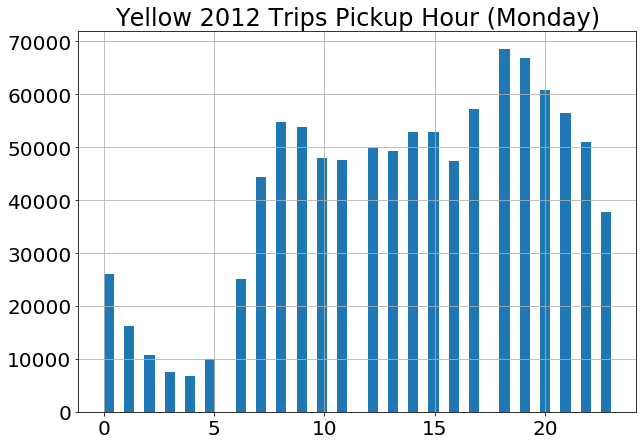

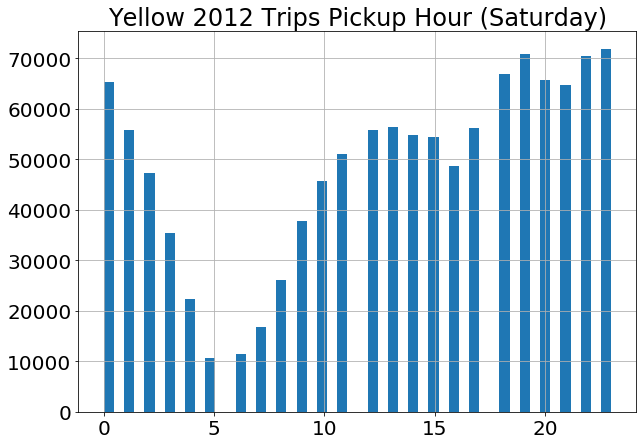

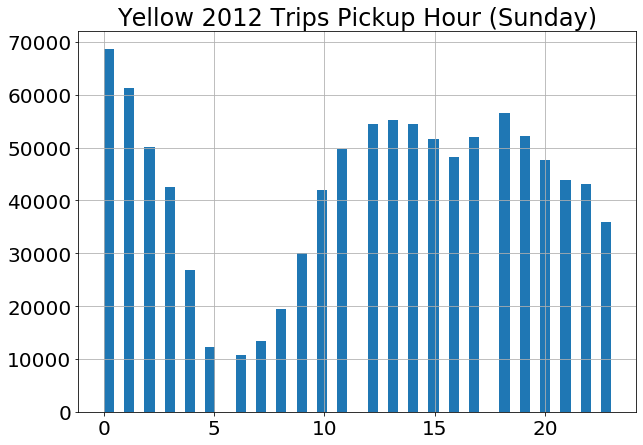

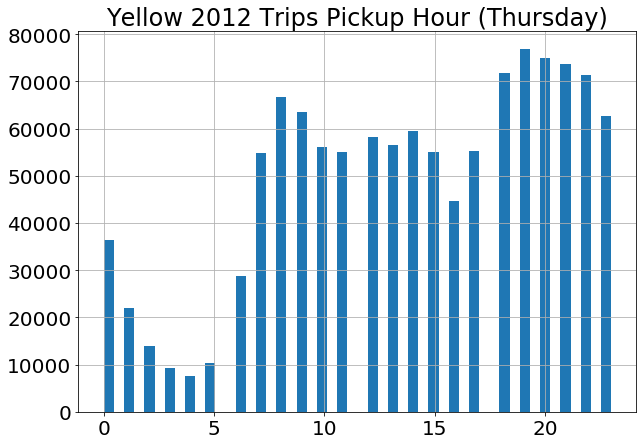

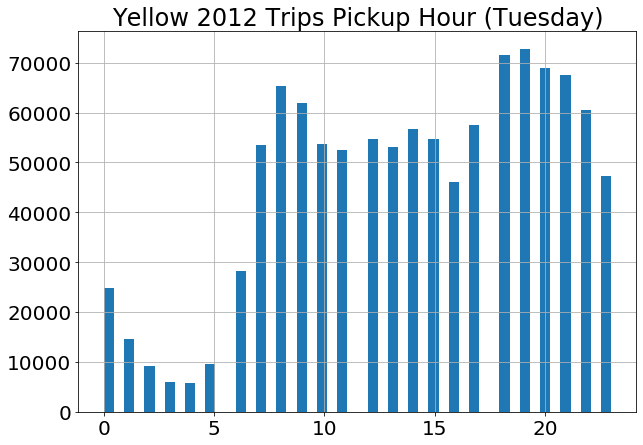

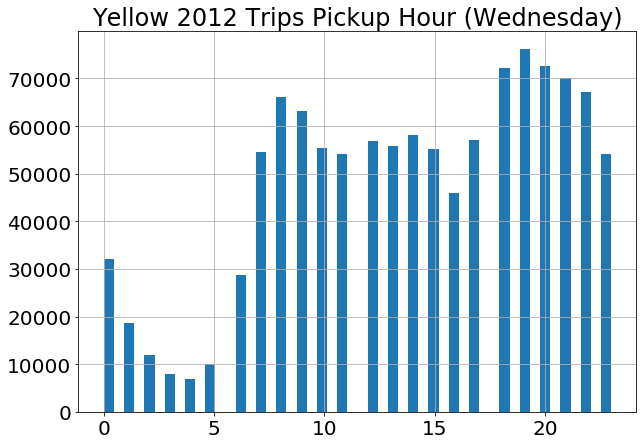

In [17]:
for group in yellow_trips_groupedby_day:
    yellow_pickup_day_hours = group[1]["format_pickup_datetime"].dt.hour
    yellow_pickup_day_hours.hist(bins=50, figsize=(10,7))
    plt.title("Yellow 2012 Trips Pickup Hour " + "(" + group[0] + ")")
    plt.rcParams.update({'font.size': 20})
    plt.show()

# Borough and NTA Analysis

In [32]:
yellow12boro = yellow_trips_data.groupby("pickup_borough").count()
yellow12boro = yellow12boro.sort_values(by=['pickup_datetime'], ascending=False)

In [33]:
yellow12boro

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,p_geometry,pickup_ntacode,pickup_ntaname,format_pickup_datetime,day_of_week
pickup_borough,,,,,,,,,,,
Manhattan,7044925,7044925,7044925,7044925,7044913,7044913,7044925,7044925,7044925,7044925,7044925
Queens,359101,359101,359101,359101,359098,359098,359101,359101,359101,359101,359101
Brooklyn,174136,174136,174136,174136,174134,174134,174136,174136,174136,174136,174136
NewJersey,12972,12972,12972,12972,12972,12972,12972,12972,12972,12972,12972
Bronx,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546,8546
Staten Island,555,555,555,555,555,555,555,555,555,555,555


Text(0.5, 1.0, 'Yellow 2012 pickup_borough')

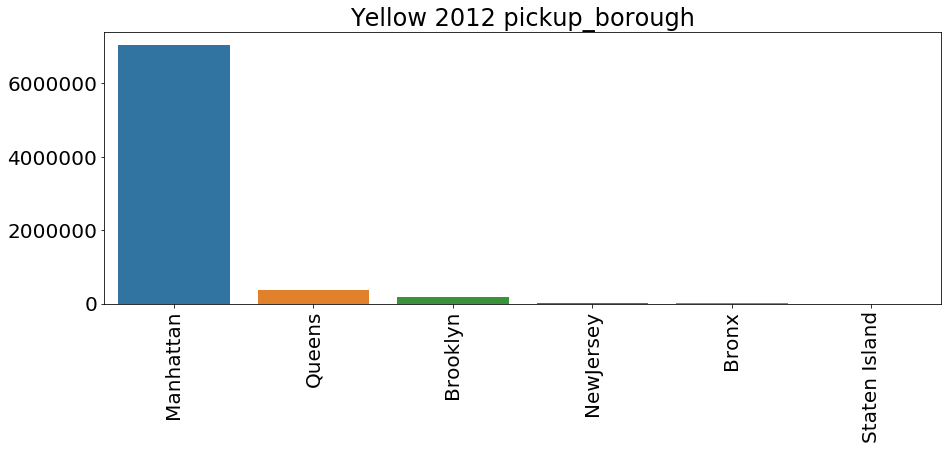

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=yellow12boro.index.values,
            y=yellow12boro.pickup_datetime.values,
           order=yellow12boro.index.values)
plt.xticks(rotation=90)
plt.title("Yellow 2012 pickup_borough")


Text(0.5, 1.0, 'Yellow 2012 top 10 NTA pickup')

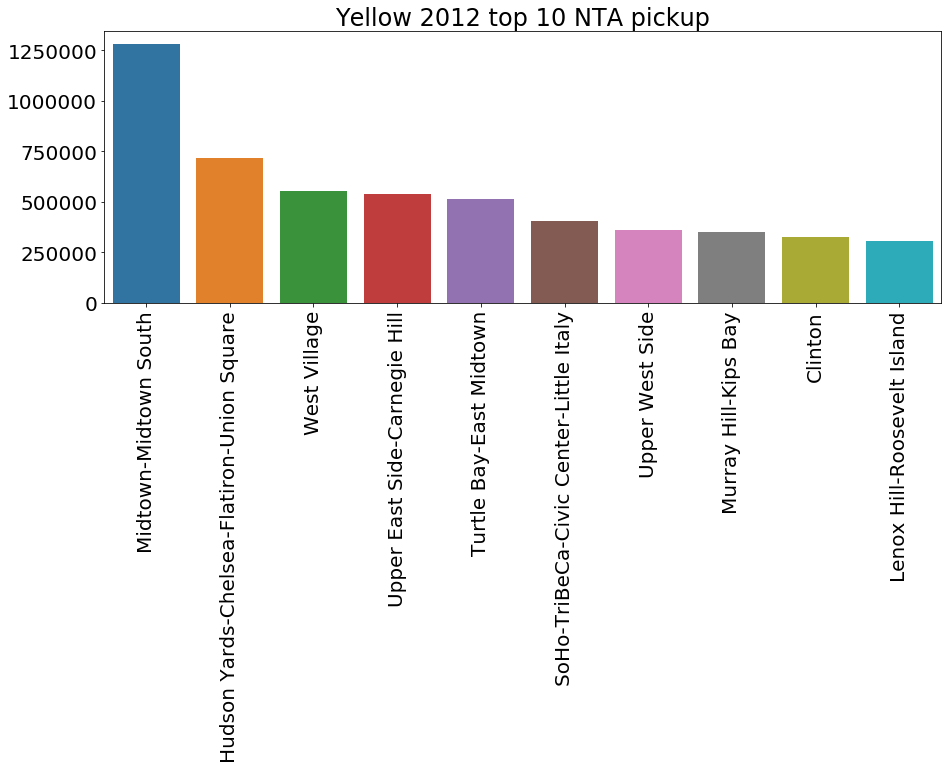

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x=yellow_trips_data["pickup_ntaname"].value_counts()[:10].index.values,
            y=yellow_trips_data["pickup_ntaname"].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.title("Yellow 2012 top 10 NTA pickup")